# Obdelava podatkov 2. del

In [1]:
import datetime
import csv
import pandas as pd
import numpy as np

In [2]:
column_names = [ 'Type A', 'Measure A', 'Units A',
                 'Type B', 'Measure B', 'Units B',
                 'Type C', 'Measure C', 'Units C', 
                 'Datetime']

In [3]:
path = 'data/DATA_rpi_data_long_R.csv'

# Uvozimo podatke
df_redundant = pd.read_csv(path, names=column_names)

In [4]:
df_redundant.head()

,Type A,Measure A,Units A,Type B,Measure B,Units B,Type C,Measure C,Units C,Datetime
0,Ping:,26.992,ms,Download:,91.80,Mbit/s,Upload:,14.31,Mbit/s,2016-11-24 13:36:25
1,Ping:,24.532,ms,Download:,88.19,Mbit/s,Upload:,14.12,Mbit/s,2016-11-24 13:36:55
2,Ping:,20.225,ms,Download:,59.86,Mbit/s,Upload:,14.11,Mbit/s,2016-11-24 13:37:25
3,Ping:,19.332,ms,Download:,91.81,Mbit/s,Upload:,14.22,Mbit/s,2016-11-24 13:37:57
4,Ping:,22.494,ms,Download:,92.05,Mbit/s,Upload:,14.08,Mbit/s,2016-11-24 13:38:27


**Urejanje prikaza podatkov**



In [5]:
df_compact = df_redundant.copy()

In [6]:
map_dict = {'Measure A':'Ping (ms)', 'Measure B': 'Download (Mbit/s)', 'Measure C': 'Upload (Mbit/s)'}

In [7]:
# preimenujemo stolvce katere bomo uporabili
df_compact.rename(columns=map_dict, inplace=True)

In [8]:
df_compact.head()

,Type A,Ping (ms),Units A,Type B,Download (Mbit/s),Units B,Type C,Upload (Mbit/s),Units C,Datetime
0,Ping:,26.992,ms,Download:,91.80,Mbit/s,Upload:,14.31,Mbit/s,2016-11-24 13:36:25
1,Ping:,24.532,ms,Download:,88.19,Mbit/s,Upload:,14.12,Mbit/s,2016-11-24 13:36:55
2,Ping:,20.225,ms,Download:,59.86,Mbit/s,Upload:,14.11,Mbit/s,2016-11-24 13:37:25
3,Ping:,19.332,ms,Download:,91.81,Mbit/s,Upload:,14.22,Mbit/s,2016-11-24 13:37:57
4,Ping:,22.494,ms,Download:,92.05,Mbit/s,Upload:,14.08,Mbit/s,2016-11-24 13:38:27


In [9]:
drop_list = ['Type A', 'Type B', 'Type C', 'Units A', 'Units B', 'Units C']

In [10]:
# odstranimo nepotrebne stolpce
df_compact.drop(drop_list, axis=1, inplace=True)

In [11]:
df_compact.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Datetime
0,26.992,91.80,14.31,2016-11-24 13:36:25
1,24.532,88.19,14.12,2016-11-24 13:36:55
2,20.225,59.86,14.11,2016-11-24 13:37:25
3,19.332,91.81,14.22,2016-11-24 13:37:57
4,22.494,92.05,14.08,2016-11-24 13:38:27


In [12]:
df_compact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 4 columns):
Ping (ms)            679 non-null object
Download (Mbit/s)    679 non-null object
Upload (Mbit/s)      673 non-null float64
Datetime             673 non-null object
dtypes: float64(1), object(3)
memory usage: 21.3+ KB


**Urejanje datuma in časa**



In [13]:
pd.to_datetime(df_compact['Datetime'][0])

Timestamp('2016-11-24 13:36:25')

In [14]:
type(pd.to_datetime(df_compact['Datetime'][0]))

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
pd.to_datetime(df_compact['Datetime'][0]).date()

datetime.date(2016, 11, 24)

In [16]:
# dodamo stolpec z datumi

df_compact['Date'] = pd.to_datetime(df_compact['Datetime']).dt.date

In [17]:
# isto
df_compact['Date'] = df_compact['Datetime'].apply(lambda dt_str: pd.to_datetime(dt_str).date())

In [18]:
df_compact.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Datetime,Date
0,26.992,91.80,14.31,2016-11-24 13:36:25,2016-11-24
1,24.532,88.19,14.12,2016-11-24 13:36:55,2016-11-24
2,20.225,59.86,14.11,2016-11-24 13:37:25,2016-11-24
3,19.332,91.81,14.22,2016-11-24 13:37:57,2016-11-24
4,22.494,92.05,14.08,2016-11-24 13:38:27,2016-11-24


In [19]:
df_compact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 5 columns):
Ping (ms)            679 non-null object
Download (Mbit/s)    679 non-null object
Upload (Mbit/s)      673 non-null float64
Datetime             673 non-null object
Date                 673 non-null object
dtypes: float64(1), object(4)
memory usage: 26.6+ KB


In [20]:
pd.to_datetime(df_compact['Datetime'][0]).time()

datetime.time(13, 36, 25)

In [21]:
#type(pd.to_datetime(to_datetime['Datetime'][0]).time())

In [22]:
df_compact['Time'] = pd.to_datetime(df_compact['Datetime']).dt.time

In [23]:
#isto 
temp = df_compact['Datetime'].apply(lambda dt_str: pd.to_datetime(dt_str))
df_compact['Time'] = temp.dt.time

In [24]:
df_compact.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Datetime,Date,Time
0,26.992,91.80,14.31,2016-11-24 13:36:25,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24 13:36:55,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24 13:37:25,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24 13:37:57,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24 13:38:27,2016-11-24,13:38:27


In [25]:
# izbrišemo stolpec Datetime
df_compact.drop('Datetime', axis=1, inplace=True)

In [26]:
df_compact.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24,13:38:27


In [27]:
type(df_compact['Date'][0])

datetime.date

In [28]:
type(df_compact['Time'][0])

datetime.time

In [29]:
df_compact.to_csv('data/OUT_rpi_data_compact.csv')

## Visualization


#### Clean and Analyze Data


**Čiščenje podatkov**



In [30]:
df_compact = pd.read_csv('data/DATA_rpi_data_compact.csv')

In [31]:
df_compact.head()

,Unnamed: 0,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,0,26.992,91.80,14.31,2016-11-24,13:36:25
1,1,24.532,88.19,14.12,2016-11-24,13:36:55
2,2,20.225,59.86,14.11,2016-11-24,13:37:25
3,3,19.332,91.81,14.22,2016-11-24,13:37:57
4,4,22.494,92.05,14.08,2016-11-24,13:38:27


In [32]:
df_compact.drop('Unnamed: 0', axis=1, inplace=True)

In [33]:
df_compact.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24,13:38:27


In [34]:
NaNs_in_df = df_compact.isnull()

In [35]:
type(NaNs_in_df)

pandas.core.frame.DataFrame

In [36]:
NaNs_in_df.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [37]:
NaNs_in_df.sum().sum()

23

In [38]:
df_compact.isnull().sum().sum()

23

In [39]:
NaNs_total = df_compact.isnull().sum().sum()

In [40]:
NaNs_pct = np.round(NaNs_total/float(len(df_compact.columns) * len(df_compact))*100, decimals=4)

In [41]:
print(f'The DataFrame contains : {NaNs_total} NaNs, equal to {NaNs_pct}% of the measurements')

The DataFrame contains : 23 NaNs, equal to 0.6765% of the measurements


In [42]:
df_compact.shape

(680, 5)

In [43]:
df_compact_clean = df_compact.dropna()

In [44]:
df_compact_clean.shape

(673, 5)

**Change values format.**

In [45]:
df_compact_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 673 entries, 0 to 679
Data columns (total 5 columns):
Ping (ms)            673 non-null object
Download (Mbit/s)    673 non-null object
Upload (Mbit/s)      673 non-null float64
Date                 673 non-null object
Time                 673 non-null object
dtypes: float64(1), object(4)
memory usage: 31.5+ KB


In [46]:
df_compact_clean.reset_index(inplace=True, drop = True)

In [47]:
df_compact_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 5 columns):
Ping (ms)            673 non-null object
Download (Mbit/s)    673 non-null object
Upload (Mbit/s)      673 non-null float64
Date                 673 non-null object
Time                 673 non-null object
dtypes: float64(1), object(4)
memory usage: 26.4+ KB


In [49]:
#df_compact_clean.drop(columns=['level_0', 'index'], inplace=True)

In [50]:
df_compact_clean.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24,13:38:27


In [51]:
df_compact_clean.dtypes

Ping (ms)             object
Download (Mbit/s)     object
Upload (Mbit/s)      float64
Date                  object
Time                  object
dtype: object

In [52]:
# pretvorimo podatke v ustrezne tipe
df_compact_clean.loc[:,'Ping (ms)'] = pd.to_numeric(df_compact_clean.loc[:,'Ping (ms)'])
df_compact_clean.loc[:,'Download (Mbit/s)'] = pd.to_numeric(df_compact_clean.loc[:,'Download (Mbit/s)'])
df_compact_clean.loc[:,'Date'] = pd.to_datetime(df_compact_clean.loc[:,'Date'])
df_compact_clean.loc[:,'Time'] = pd.to_datetime(df_compact_clean.loc[:,'Time'])

C:\Users\18icta11\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [53]:
df_compact_clean.dtypes

Ping (ms)                   float64
Download (Mbit/s)           float64
Upload (Mbit/s)             float64
Date                 datetime64[ns]
Time                 datetime64[ns]
dtype: object

In [54]:
# df_compact_clean.loc[:,'Ping (ms)'] = df_compact_clean.loc[:,'Ping (ms)'].apply(lambda val: float(val))

In [55]:
df_compact_clean.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,2019-06-03 13:36:25
1,24.532,88.19,14.12,2016-11-24,2019-06-03 13:36:55
2,20.225,59.86,14.11,2016-11-24,2019-06-03 13:37:25
3,19.332,91.81,14.22,2016-11-24,2019-06-03 13:37:57
4,22.494,92.05,14.08,2016-11-24,2019-06-03 13:38:27


In [56]:
reidexed_columns = ['Date', 'Time', 'Ping (ms)','Download (Mbit/s)','Upload (Mbit/s)']

In [57]:
df_compact_clean = df_compact_clean.reindex(columns=reidexed_columns)

In [58]:
df_compact_clean.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,2019-06-03 13:36:25,26.992,91.80,14.31
1,2016-11-24,2019-06-03 13:36:55,24.532,88.19,14.12
2,2016-11-24,2019-06-03 13:37:25,20.225,59.86,14.11
3,2016-11-24,2019-06-03 13:37:57,19.332,91.81,14.22
4,2016-11-24,2019-06-03 13:38:27,22.494,92.05,14.08


In [59]:
df_clean = df_compact_clean.copy()

## Basic statistics


**Calculate mean and standard deviation using Pandas.**


In [60]:
means = df_clean.mean()

In [61]:
means

Ping (ms)            21.115452
Download (Mbit/s)    90.449212
Upload (Mbit/s)      13.697608
dtype: float64

In [62]:
stands = df_clean.std()

In [63]:
stands

Ping (ms)            5.161225
Download (Mbit/s)    3.465647
Upload (Mbit/s)      1.080471
dtype: float64

In [64]:
means['Ping (ms)']

21.115451708766724

In [65]:
print(f"Average ping time: {means['Ping (ms)']} ± {stands['Ping (ms)']} ms")
print(f"Average download speed: {means['Download (Mbit/s)']} ± {stands['Download (Mbit/s)']} Mbit/s")
print(f"Average upload speed: {means['Upload (Mbit/s)']} ± {stands['Upload (Mbit/s)']} Mbit/s ")

Average ping time: 21.115451708766724 ± 5.161225495663228 ms
Average download speed: 90.44921248142644 ± 3.4656470318152284 Mbit/s
Average upload speed: 13.697607726597328 ± 1.0804708853031768 Mbit/s 


**Izračun minimalnih in maksimalnih vrednosti**


In [66]:
mins = df_clean.min()

In [67]:
mins

Date                 2016-11-24 00:00:00
Time                 2019-06-03 13:36:25
Ping (ms)                         16.167
Download (Mbit/s)                  58.48
Upload (Mbit/s)                     6.21
dtype: object

In [68]:
maxs = df_clean.max()

In [69]:
maxs

Date                 2016-11-24 00:00:00
Time                 2019-06-03 19:18:16
Ping (ms)                         76.528
Download (Mbit/s)                  92.87
Upload (Mbit/s)                    14.55
dtype: object

In [71]:
#print(f'Min ping time: {mima_ping[0]} ms. Max ping time: {mima_ping[1]} ms')
#print(f'Min download speed: {mima_download[0]} Mbit/s. Max download speed: {mima_download[1]} Mbit/s')
#print(f'Min upload speed: {mima_upload[0]} Mbit/s. Max upload speed: {mima_upload[1]} Mbit/s')

In [72]:
df_clean.describe()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
count,673.000000,673.000000,673.000000
mean,21.115452,90.449212,13.697608
std,5.161225,3.465647,1.080471
min,16.167000,58.480000,6.210000
25%,19.115000,90.220000,13.640000
50%,20.322000,91.560000,13.980000
75%,21.843000,92.070000,14.180000
max,76.528000,92.870000,14.550000


**Uporaba idxmin, idxmax and iloc**


In [73]:
argmax_ping = df_clean['Ping (ms)'].idxmax()

In [74]:
argmax_ping

461

In [75]:
argmin_ping = df_clean['Ping (ms)'].idxmin()

In [76]:
#argmin_ping

In [77]:
df_clean.iloc[argmax_ping]['Time'].time()

datetime.time(17, 30, 6)

In [80]:
# print(f'Ping measure reached minimum on {} at {}')

# print(f'Ping measure reached maximum on {} at {}')

In [81]:
df_corr = df_clean.corr()

In [82]:
df_corr

,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
Ping (ms),1.000000,-0.045626,-0.463099
Download (Mbit/s),-0.045626,1.000000,0.083690
Upload (Mbit/s),-0.463099,0.083690,1.000000


In [83]:
print(f'Correlation coefficient between ping and download: {df_corr.iloc[0,1]}')
#print(f'Correlation coefficient between ping and upload: {}')
#print(f'Correlation coefficient between upload and download: {}')

Correlation coefficient between ping and download: -0.04562611025837995


## Visualize Data



In [84]:
import matplotlib.pyplot as plt
%matplotlib inline 

**Plot Internet speed stats.**


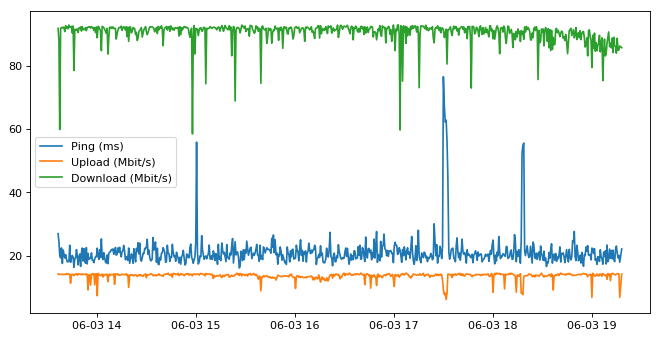

In [87]:
plt.figure(figsize=(10,5), dpi=80)
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

t = pd.to_datetime(df_clean['Time'])

plt.plot(t, df_clean['Ping (ms)'], label='Ping (ms)')
plt.plot(t, df_clean['Upload (Mbit/s)'], label='Upload (Mbit/s)')
plt.plot(t, df_clean['Download (Mbit/s)'], label='Download (Mbit/s)')

plt.legend()
plt.show()

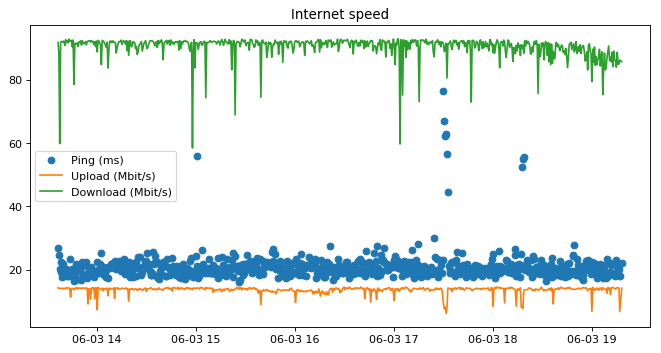

In [86]:
plt.figure(figsize=(10,5), dpi=80)

t = pd.to_datetime(df_clean['Time'])

plt.plot(t, df_clean['Ping (ms)'],'o',label='Ping (ms)')
plt.plot(t, df_clean['Upload (Mbit/s)'], label='Upload (Mbit/s)')
plt.plot(t, df_clean['Download (Mbit/s)'], label='Download (Mbit/s)')

plt.title('Internet speed')

plt.legend()
plt.show()

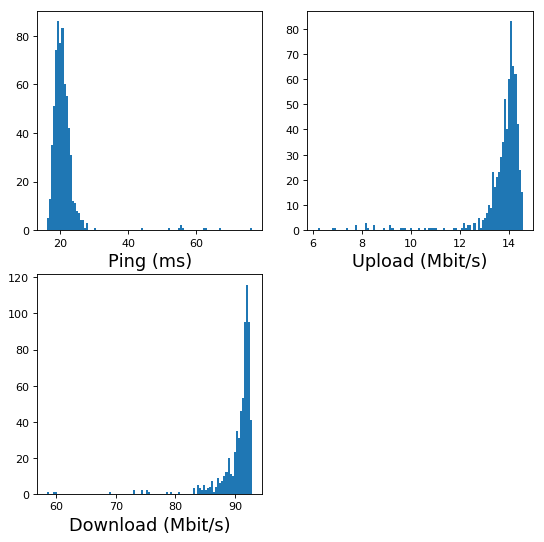

In [93]:
plt.figure(figsize=(8,8), dpi=80)

plt.subplot(2,2,1)
plt.hist(df_clean['Ping (ms)'], 100)
plt.xlabel('Ping (ms)', fontsize=16)
plt.tick_params(labelsize=10)

plt.subplot(2,2,2)
plt.hist(df_clean['Upload (Mbit/s)'], 100)
plt.xlabel('Upload (Mbit/s)', fontsize=16)
plt.tick_params(labelsize=10)

plt.subplot(2,2,3)
plt.hist(df_clean['Download (Mbit/s)'], 100)
plt.xlabel('Download (Mbit/s)', fontsize=16)
plt.tick_params(labelsize=10)

plt.show()

## Internet Meter Anomaly Detection 


**Create a Dataframe and modify the quantities**



In [94]:
df_clean.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,2019-06-03 13:36:25,26.992,91.80,14.31
1,2016-11-24,2019-06-03 13:36:55,24.532,88.19,14.12
2,2016-11-24,2019-06-03 13:37:25,20.225,59.86,14.11
3,2016-11-24,2019-06-03 13:37:57,19.332,91.81,14.22
4,2016-11-24,2019-06-03 13:38:27,22.494,92.05,14.08


In [105]:
df_rates = df_clean.copy()

In [106]:
df_rates.drop(['Date', 'Time', 'Ping (ms)'], axis=1, inplace=True)
lookup = {'Download (Mbit/s)': 'download_rate', 'Upload (Mbit/s)': 'upload_rate'}
df_rates.rename(columns=lookup, inplace=True)
ping_rate = 1. / df_clean['Ping (ms)']
ping_rate = 1000 * ping_rate
df_rates['ping_rate'] = ping_rate

In [107]:
df_rates.head()

,download_rate,upload_rate,ping_rate
0,91.80,14.31,37.048014
1,88.19,14.12,40.763085
2,59.86,14.11,49.443758
3,91.81,14.22,51.727705
4,92.05,14.08,44.456299


**Vizualizacija podatkov**



In [108]:
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact

In [109]:
def f(x):
    return x**2

In [110]:
interact(f, x=(0,100))

interactive(children=(IntSlider(value=50, description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.f(x)>

In [113]:
def scatter_view(x,y,z,azim,elev):
    fig = plt.figure(figsize=(8,8), dpi=80)
    ax = Axes3D(fig)
    
    ax.scatter(x,y,z)
    ax.set_xlabel('D rate (Mbit/s)', fontsize=16)
    ax.set_ylabel('U rate (Mbit/s)', fontsize=16)
    ax.set_zlabel('P rate (1/s)', fontsize=16)
    
    ax.azim = azim
    ax.elev = elev

In [114]:
xi = df_rates['download_rate']
yi = df_rates['upload_rate']
zi = df_rates['ping_rate']

interact(lambda azim, elev: scatter_view(xi, yi, zi, azim, elev), azim=(0,90), elev=(0,90))

plt.show()

interactive(children=(IntSlider(value=45, description='azim', max=90), IntSlider(value=45, description='elev',…